REF: 
   - https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
   - https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb   

In [157]:
import pandas as pd
import numpy as np

In [158]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/s0m0ebu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [159]:
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer


In [160]:
# !pip install gensim

In [161]:
from gensim.parsing.preprocessing import remove_stopwords

In [162]:
import os
!pwd

/Users/s0m0ebu/Desktop/datascience/aim_hack_sentiment_text


In [163]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.col', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',600)

In [164]:
inp_path = "/Users/s0m0ebu/Desktop/datascience/aim_hack_sentiment_text"
out_path = "/Users/s0m0ebu/Desktop/datascience/aim_hack_sentiment_text"

In [165]:
train_df = pd.read_csv(inp_path + "/data/train.csv")

In [166]:
print("Shape of the training sample", train_df.shape)
print("% of total records for each group\n",(train_df.iloc[:,2:].sum()*100/train_df.shape[0]))

Shape of the training sample (6136, 14)
% of total records for each group
 Components                        4.465450
Delivery and Customer Support     2.917210
Design and Aesthetics            10.593220
Dimensions                       11.326597
Features                          5.101043
Functionality                    41.362451
Installation                     12.418514
Material                          2.526076
Price                            13.917862
Quality                          35.479140
Usability                        20.029335
Polarity                         77.737940
dtype: float64


In [167]:
train_df.info() # No. missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [168]:
train_df.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking the toilet support design for some reason I'm very unhappy with his toilet never buy American standard again,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of spray patterns, it puts out a large volume of water out of my 1"" pipes",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install and well made,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with hanging fan,0,0,0,0,0,1,0,0,0,0,1,1
4,4,"I would recommend this product because it is perfect for watering hanging baskets, the wand has a shut off vale on it to be able to shut off as you move from one plant to another.See more",0,0,0,0,0,0,0,0,0,1,0,1


In [169]:
# Sample Reviews
train_df[['Review']].head()

,Review
0,For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking the toilet support design for some reason I'm very unhappy with his toilet never buy American standard again
1,"I like everything about it, great choice of spray patterns, it puts out a large volume of water out of my 1"" pipes"
2,Excellent ceiling fan brace. Easy to install and well made
3,Work great easy to use . No issues at all with hanging fan
4,"I would recommend this product because it is perfect for watering hanging baskets, the wand has a shut off vale on it to be able to shut off as you move from one plant to another.See more"


In [196]:
# Standardize text 
def standardize_text(df, text_field, text_field_cleaned):
    df[text_field_cleaned] = df[text_field].str.replace(r"http\S+", "")
    df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"http", "")
    df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"@\S+", "")
#     df[text_field_cleaned] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"[^A-Za-z0-9()!?@\'\`\"\_\n]", " ")
    df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"@", "at")
#     df[text_field_cleaned] = df[text_field].str.replace(r"[',']", " ")
    df[text_field_cleaned] = df[text_field_cleaned].str.lower()
    return df

train_df = standardize_text(train_df, "Review", "cleaned_review")

<ipython-input-196-223638ce195b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field_cleaned] = df[text_field].str.replace(r"http\S+", "")
<ipython-input-196-223638ce195b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"@\S+", "")
<ipython-input-196-223638ce195b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field_cleaned] = df[text_field_cleaned].str.replace(r"[^A-Za-z0-9()!?@\'\`\"\_\n]", " ")


In [198]:
# Removing Stop words from verbatim
train_df['cleaned_review'] = train_df['cleaned_review'].apply(lambda x: remove_stopwords(x))

In [199]:
# Tokenisation 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\S.,]+") # Using space as seperator, can also use split instead

train_df["cleaned_review"] = train_df["cleaned_review"].apply(lambda x: tokenizer.tokenize(x))

In [200]:
# Lemmitasation
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

train_df["cleaned_review"] = train_df["cleaned_review"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [201]:
train_df[['Review', 'cleaned_review']].head()

,Review,cleaned_review
0,For some reason everybody complains and I'm complaining now about my toilet that I just boughtFor some reason it's not ceiling from the tank to the pedestal I can't get it sealed without cracking the toilet support design for some reason I'm very unhappy with his toilet never buy American standard again,"[reason, everybody, complains, i'm, complaining, toilet, boughtfor, reason, it's, ceiling, tank, pedestal, can't, sealed, cracking, toilet, support, design, reason, i'm, unhappy, toilet, buy, american, standard]"
1,"I like everything about it, great choice of spray patterns, it puts out a large volume of water out of my 1"" pipes","[like, great, choice, spray, pattern, put, large, volume, water, 1"", pipe]"
2,Excellent ceiling fan brace. Easy to install and well made,"[excellent, ceiling, fan, brace, easy, install]"
3,Work great easy to use . No issues at all with hanging fan,"[work, great, easy, use, issue, hanging, fan]"
4,"I would recommend this product because it is perfect for watering hanging baskets, the wand has a shut off vale on it to be able to shut off as you move from one plant to another.See more","[recommend, product, perfect, watering, hanging, basket, wand, shut, vale, able, shut, plant]"


In [203]:
lemmatizer.lemmatize("hanging")

'hanging'

In [208]:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

all_words = [word for tokens in train_df["cleaned_review"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in train_df["cleaned_review"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

86856 words total, with a vocabulary size of 8049
Max sentence length is 174


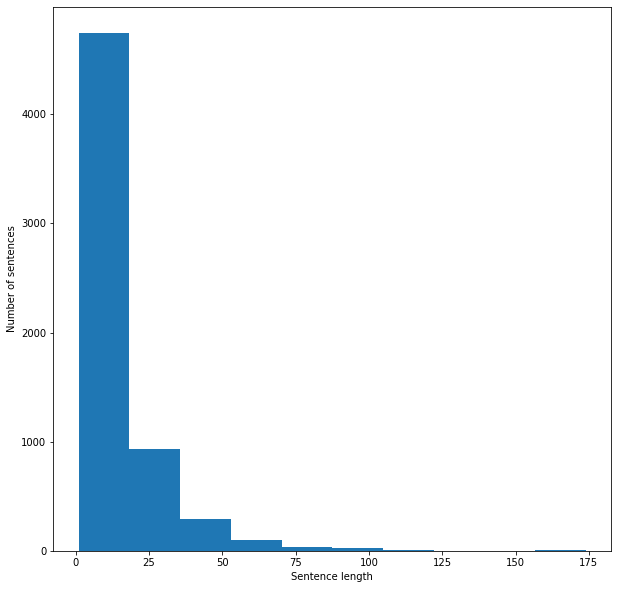

In [209]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [211]:
### Bag of Words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = train_df["Review"].tolist()
list_labels = train_df["Polarity"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

### Visulaising Embeddings

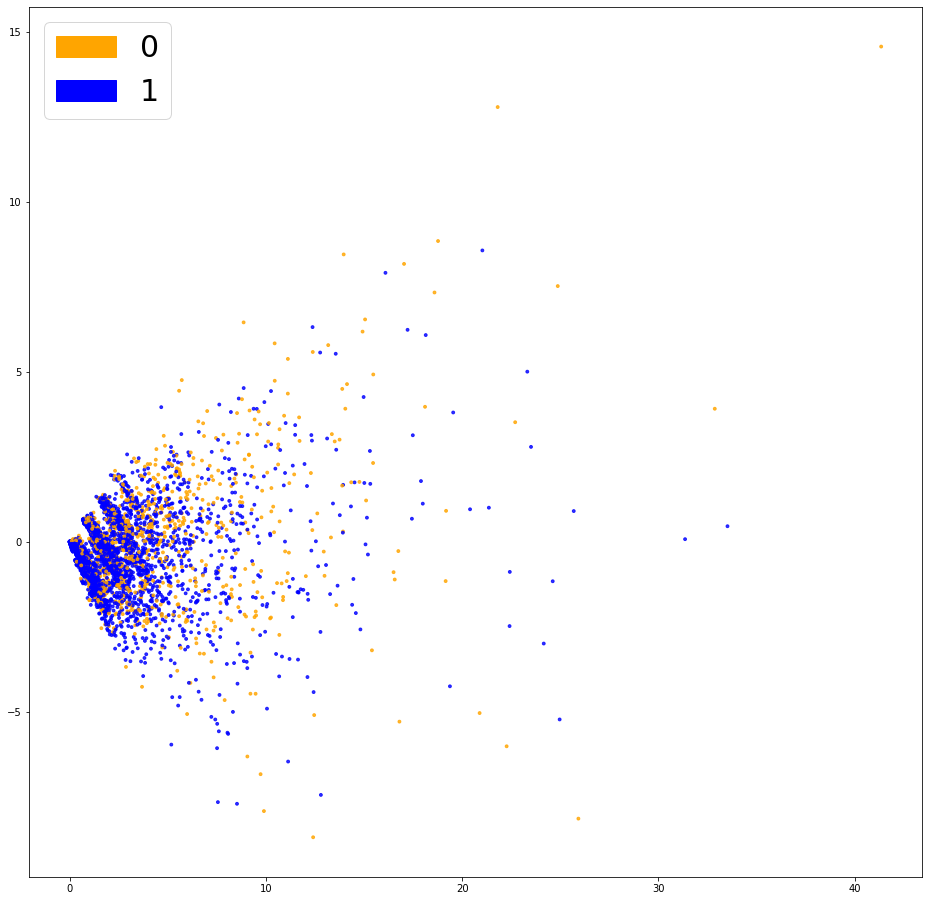

In [212]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='0')
            green_patch = mpatches.Patch(color='blue', label='1')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()


## Fitting a Classifier

In [213]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

## Evaluation

In [215]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.886, precision = 0.891, recall = 0.886, f1 = 0.888


In [216]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt


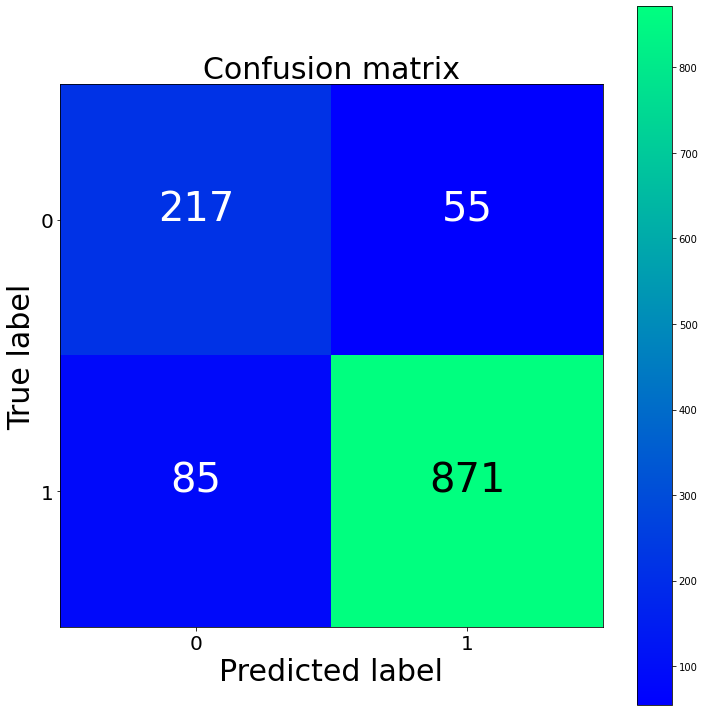

[[217  55]
 [ 85 871]]


In [218]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)